In [11]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
import algorithms as alg
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-10, 10)

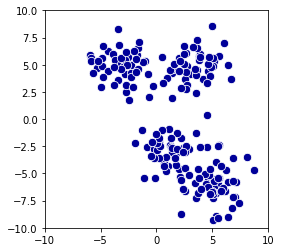

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
from sklearn.datasets import make_blobs

seed = 10
n_data = 200
n_clusters = 4
n_centers = 4

blobs, blob_labels = make_blobs(
    n_samples=n_data, n_features=2, centers=n_centers, random_state=seed, cluster_std=2
)

blobs *= 0.75
blobs += 1.1

plt.figure(figsize=(4, 4))
plt.scatter(
    blobs[:, 0], blobs[:, 1], s=70, color="#000099", edgecolors="white", linewidth=0.8
)
plt.xlim([-10, 10])
plt.ylim([-10, 10])

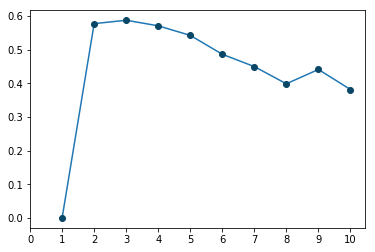

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
x = []
y = []
k = 10
for i in range(1, k + 1):
    K = alg.Kmeans(n_clusters=i, select="k-means++", n_init=10, max_iter=300)
    K.calc(blobs)
    x.append(i)
    y.append(alg.silhouette(blobs, K.labels))
plt.plot(x, y)
plt.plot(x, y, "o", color="#0a4766")
plt.xticks(np.arange(0, k + 1, 1.0))
plt.show()

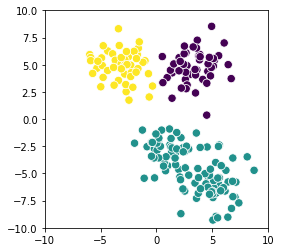

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [188]:
K = alg.Kmeans(n_clusters=3, select="k-means++", n_init=10, max_iter=300).calc(blobs)
plt.figure(figsize=(4, 4))
plt.scatter(
    blobs[:, 0], blobs[:, 1], s=70, c=K.labels, edgecolors="white", linewidth=0.8
)
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

## Исследование зависимости от начальной инициализации 

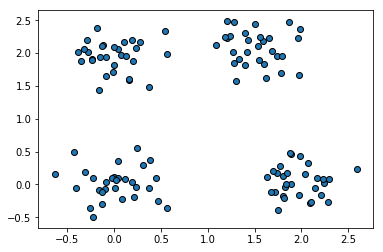

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [75]:
X, Y = make_blobs(
    n_samples=120,
    n_features=2,
    centers=[[0, 0], [1.5, 2], [2, 0], [0, 2]],
    center_box=(-1, 1),
    cluster_std=0.25,
)
plt.scatter(X[:, 0], X[:, 1], edgecolors="black")

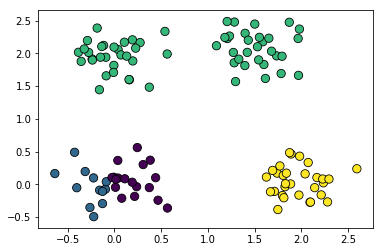

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
K = alg.Kmeans(
    n_clusters=4, select="random", n_init=1, max_iter=100, random_state=11
).calc(X)
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=70, c=K.labels, edgecolors="black", linewidth=0.8)
plt.show()

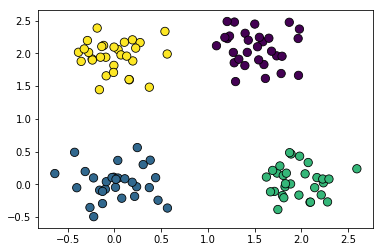

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [77]:
K = alg.Kmeans(
    n_clusters=4, select="k-means++", n_init=1, max_iter=100, random_state=False
).calc(X)
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=70, c=K.labels, edgecolors="black", linewidth=0.8)
plt.show()

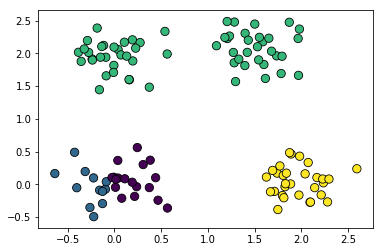

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
K = alg.Kmeans(
    n_clusters=[[0, 0], [-0.7, -0.5], [1.4, 2.0], [2, 0]],
    select="",
    n_init=1,
    max_iter=100,
    random_state=False,
).calc(X)
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], s=70, c=K.labels, edgecolors="black", linewidth=0.8)
plt.show()

## Для каких задач подходит

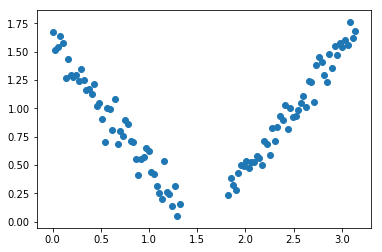

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [181]:
X = np.concatenate(
    (
        np.linspace(0, 3.14 / 2 - 0.25, 50)[np.newaxis, :],
        np.linspace(0, 3.14, 50)[np.newaxis, :],
    ),
    axis=None,
)

Y = np.abs(X - 1.5) + np.random.normal(size=X.shape[0], scale=0.1)
plt.figure(figsize=(6, 4))
plt.scatter(X, Y)

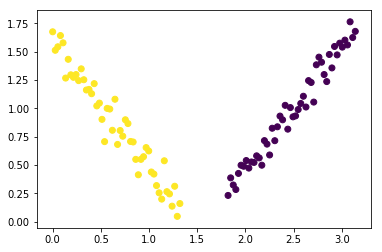

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [187]:
K = alg.Kmeans(n_clusters=2, select="k-means++").calc(
    np.concatenate((X.reshape(-1, 1), Y.reshape(-1, 1)), axis=1)
)
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, c=K.labels)